# Data Collection

In the unemployment forecast project for the United States between 2000 and 2015, rates were obtained using characteristics such as education level, age group, and labor force participation rate.

sources I used when collecting data:
*  https://databank.worldbank.org/source/jobs#
*  https://ilostat.ilo.org/data/#



In [ ]:
import pandas as pd

# Manually adding data to DataFrames
age_group_data = {
    "Year": [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    "age_16_24_rate": [9.325, 10.58, 11.99, 12.41, 11.83, 11.28, 10.48, 10.55, 12.83, 17.61, 18.43, 17.32, 16.22, 15.52, 13.37, 11.62],
    "age_25_34_rate": [3.69, 4.67, 5.87, 6.07, 5.51, 5.13, 4.66, 4.65, 5.88, 9.88, 10.04, 9.45, 8.23, 7.42, 6.51, 5.5],
    "age_35_44_rate": [3.01, 3.66, 4.6, 4.94, 4.36, 3.87, 3.58, 3.45, 4.6, 7.98, 8.08, 7.32, 6.58, 5.88, 4.74, 4.14],
    "age_45_54_rate": [2.45, 3.11, 4.03, 4.08, 3.83, 3.48, 3.1, 3.18, 4.11, 7.18, 7.69, 7.03, 6.23, 5.65, 4.4, 3.72],
    "age_55plus_rate": [2.59, 3.03, 3.84, 4.06, 3.74, 3.36, 2.96, 3.14, 3.83, 6.59, 7.02, 6.61, 6.03, 5.34, 4.41, 3.78]
}

labor_force_data = {
    "Year": [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    "labor_force_participation_rate": [66.43, 66.07, 65.71, 65.31, 65.04, 65.06, 65.17, 64.99, 64.98, 64.32, 63.58, 63.02, 62.9, 62.52, 62.21, 62.01],
    "basic_education_rate": [28.3, 28.47, 28.43, 28.71, 28.49, 28.2, 28.58, 29.08, 28.8, 29.71, 29.3, 28.91, 29.17, 28.26, 28.6, 28.75],
    "intermediate_education_rate": [57.89, 57.64, 57.2, 56.67, 56, 55.89, 55.74, 55.17, 54.93, 54.11, 53.45, 52.67, 51.82, 51.06, 50.63, 50.24],
    "advanced_education_rate": [74.23, 73.41, 73.15, 73.25, 73.02, 73.16, 73.1, 73.09, 73.48, 73.35, 72.44, 71.88, 71.49, 70.96, 70.39, 69.72],
    "unemployment_rate": [3.99, 4.73, 5.78, 5.99, 5.53, 5.08, 4.62, 4.62, 5.78, 9.25, 9.63, 8.95, 8.07, 7.38, 6.17, 5.28]
}

# Create DataFrames
age_group_df = pd.DataFrame(age_group_data)
labor_force_df = pd.DataFrame(labor_force_data)

# Combine data
merged_data = pd.merge(age_group_df, labor_force_df, on="Year")

# Save as CSV
merged_data.to_csv("usa_labor_force_data_2000_2015.csv", index=False)

print("Data merged successfully and CSV file saved!")


Data merged successfully and CSV file saved!


# Generating a dataset

A data set is created using the collected proportional values. The created data set is created with missing values.

In [ ]:
import numpy as np
import os

# Define categories for Education Level and Age Group
education_levels = ["Basic", "Intermediate", "Advanced"]
age_groups = ["16-24", "25-34", "35-44", "45-54", "55+"]

data = pd.read_csv("usa_labor_force_data_2000_2015.csv")
# Initialize the synthetic data list
synthetic_data = []

# Number of synthetic records to generate
total_records = 2000

# Missing data probability
missing_data_prob = 0.1

# Generate the data for each year
for year in age_group_df['Year']:

    # Get the relevant rates for the current year
    labor_force_participation_rate = labor_force_df[labor_force_df['Year'] == year]['labor_force_participation_rate'].values[0]
    unemployment_rate = labor_force_df[labor_force_df['Year'] == year]['unemployment_rate'].values[0]

    # Generate the age group data for the current year
    age_16_24_rate = age_group_df[age_group_df['Year'] == year]['age_16_24_rate'].values[0]
    age_25_34_rate = age_group_df[age_group_df['Year'] == year]['age_25_34_rate'].values[0]
    age_35_44_rate = age_group_df[age_group_df['Year'] == year]['age_35_44_rate'].values[0]
    age_45_54_rate = age_group_df[age_group_df['Year'] == year]['age_45_54_rate'].values[0]
    age_55plus_rate = age_group_df[age_group_df['Year'] == year]['age_55plus_rate'].values[0]

    # Define education level rates for the current year
    basic_education_rate = labor_force_df[labor_force_df['Year'] == year]['basic_education_rate'].values[0]
    intermediate_education_rate = labor_force_df[labor_force_df['Year'] == year]['intermediate_education_rate'].values[0]
    advanced_education_rate = labor_force_df[labor_force_df['Year'] == year]['advanced_education_rate'].values[0]

    # Create population categories based on rates for each year
    total_population = 301_800_000 # Example population (avg 2000-2015)

    # Generate the synthetic records by sampling according to the rates
    for _ in range(total_records // len(age_group_df['Year'].unique())):
        # Randomly assign age group
        age_group = np.random.choice(
            ['16-24', '25-34', '35-44', '45-54', '55+'],
            p=[age_16_24_rate, age_25_34_rate, age_35_44_rate, age_45_54_rate, age_55plus_rate] / sum([age_16_24_rate, age_25_34_rate, age_35_44_rate, age_45_54_rate, age_55plus_rate])
        )

        # Assign education level based on participation rate
        education_level = np.random.choice(
            ['Basic', 'Intermediate', 'Advanced'],
            p=[basic_education_rate, intermediate_education_rate, advanced_education_rate] / sum([basic_education_rate, intermediate_education_rate, advanced_education_rate])
        )

        # Random labor force participation and unemployment based on the rates
        labor_force_participation = np.random.normal(labor_force_participation_rate, 2)
        unemployment = np.random.normal(unemployment_rate, 1)

        # Introduce missing data randomly
        if np.random.rand() < missing_data_prob:
            labor_force_participation = np.nan
        if np.random.rand() < missing_data_prob:
            unemployment = np.nan
        if np.random.rand() < missing_data_prob:
            age_group = np.nan
        if np.random.rand() < missing_data_prob:
            education_level = np.nan

        # Ensure the values stay within reasonable bounds
        if labor_force_participation is not np.nan:
            labor_force_participation = max(0, min(100, labor_force_participation))
        if unemployment is not np.nan:
            unemployment = max(0, min(100, unemployment))

        # Append generated data row
        synthetic_data.append({
            "Year": year,
            "Age Group": age_group,
            "Education Level": education_level,
            "Labor Force Participation Rate": labor_force_participation,
            "Unemployment Rate": unemployment
        })

# Convert to DataFrame
synthetic_df = pd.DataFrame(synthetic_data)

# Define the output path for the Excel file
output_path = "synthetic_labor_data_random.xlsx"  # You can change the file name if needed

# Save the synthetic data to an Excel file
synthetic_df.to_excel(output_path, index=False)
print(f"File saved at: {os.path.abspath(output_path)}")


File saved at: /content/synthetic_labor_data_random.xlsx


# Data processing and data set review

In the data processing stages, I filled in missing data, digitized categorical data, and normalized numerical data. After all these processes, I saved the processed data set as a new file. Then, I observed the created data set using data visualization.

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#Load data
data = pd.read_excel("/content/synthetic_labor_data_random.xlsx")

# Categorical and numerical columns
categorical_columns = ['Education Level', 'Age Group']
numeric_columns = ['Labor Force Participation Rate', 'Unemployment Rate']

# Fill in missing data
for col in categorical_columns:
    mode_value = data[col].mode()[0]  # Mode value
    data[col].fillna(mode_value, inplace=True)  # Fill in missing data with mode value

for col in numeric_columns:
    mean_value = data[col].mean()  # Average value
    data[col].fillna(mean_value, inplace=True)  # Fill in missing data with average value

#Label Coding for Education Level
label_encoder = LabelEncoder()
data['Education Level'] = label_encoder.fit_transform(data['Education Level'])

# One-Hot Encoding for Age Group
data = pd.get_dummies(data, columns=['Age Group'], dtype=int)

# Normalize numeric data
scaler = MinMaxScaler()

# Normalize the Labor Force Participation Rate and Unemployment Rate columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# View new dataset
print(data.head())

# Save processed data
output_path = '/content/processed_data.xlsx'
data.to_excel(output_path, index=False)

output_path


<ipython-input-1-cd23e60af918>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mode_value, inplace=True)  # Fill in missing data with mode value
<ipython-input-1-cd23e60af918>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

   Year  Education Level  Labor Force Participation Rate  Unemployment Rate  \
0  2000                0                        0.852046           0.069369   
1  2000                0                        0.643022           0.202900   
2  2000                2                        0.595178           0.417413   
3  2000                2                        0.544901           0.100278   
4  2000                0                        0.846473           0.321291   

   Age Group_16-24  Age Group_25-34  Age Group_35-44  Age Group_45-54  \
0                0                0                1                0   
1                0                0                1                0   
2                0                1                0                0   
3                0                1                0                0   
4                1                0                0                0   

   Age Group_55+  
0              0  
1              0  
2              0  
3         

'/content/processed_data.xlsx'

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

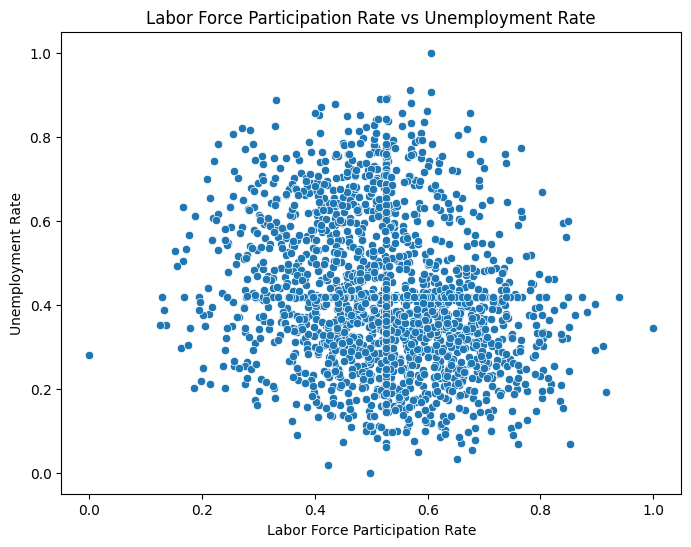

In [3]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Labor Force Participation Rate', y='Unemployment Rate', data=data)
plt.title('Labor Force Participation Rate vs Unemployment Rate')
plt.xlabel('Labor Force Participation Rate')
plt.ylabel('Unemployment Rate')
plt.show()

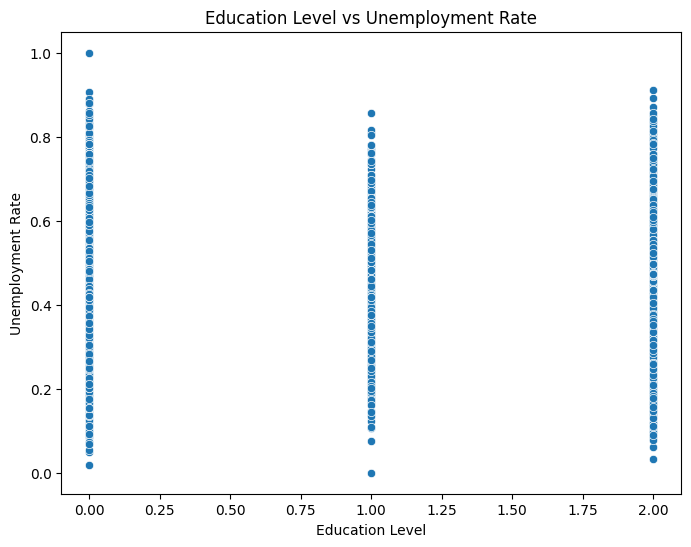

In [4]:
# Education level vs. unemployment rate
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Education Level', y='Unemployment Rate', data=data)
plt.title('Education Level vs Unemployment Rate')
plt.xlabel('Education Level')
plt.ylabel('Unemployment Rate')
plt.show()

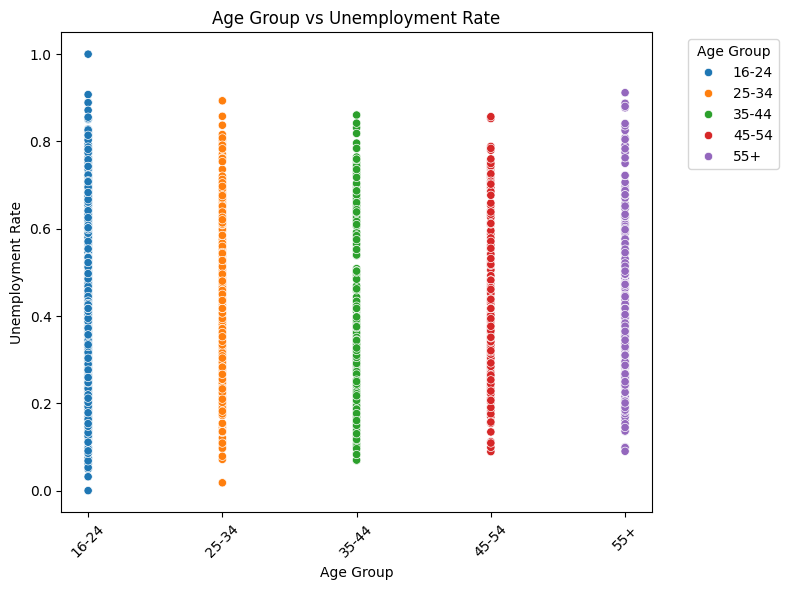

In [5]:
# Original labels corresponding to categorical values ​​of age groups
age_group_labels = ['16-24', '25-34', '35-44', '45-54', '55+']

# Get one-hot encoded column names
# Use 'data' instead of 'df' to access the DataFrame
age_group_columns = [col for col in data.columns if col.startswith('Age Group_')]

# Convert and filter one-hot encoded data to long format
# Use 'data' instead of 'df' to access the DataFrame
df_long = data.melt(id_vars=['Unemployment Rate'],
                  value_vars=age_group_columns,
                  var_name='Age Group',
                  value_name='Presence')
df_long = df_long[df_long['Presence'] == 1]

# Convert age group columns to original labels
df_long['Age Group'] = df_long['Age Group'].str.split('_').str[1].astype(str)

# Create scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age Group', y='Unemployment Rate', hue='Age Group', data=df_long, palette='tab10')
plt.title('Age Group vs Unemployment Rate')
plt.xlabel('Age Group')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Model Training and Evaluation

I divided the dataset into test and training sets in proportions such that the algorithms to be applied would perform best. Then, I applied the algorithms I selected, Linear Regression, Random Forest, Ridge and Lasso, on the processed dataset.

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import numpy as np


processed_df = pd.read_excel('/content/processed_data.xlsx')

# Determining independent and dependent variables
X = processed_df.drop('Unemployment Rate', axis=1)
y = processed_df['Unemployment Rate']

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Make a guess
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 0.02160313441040449
Root Mean Squared Error (RMSE): 0.1469800476609138
R-squared (R2): 0.2045329651199278
Mean Absolute Error (MAE): 0.11626940969971747


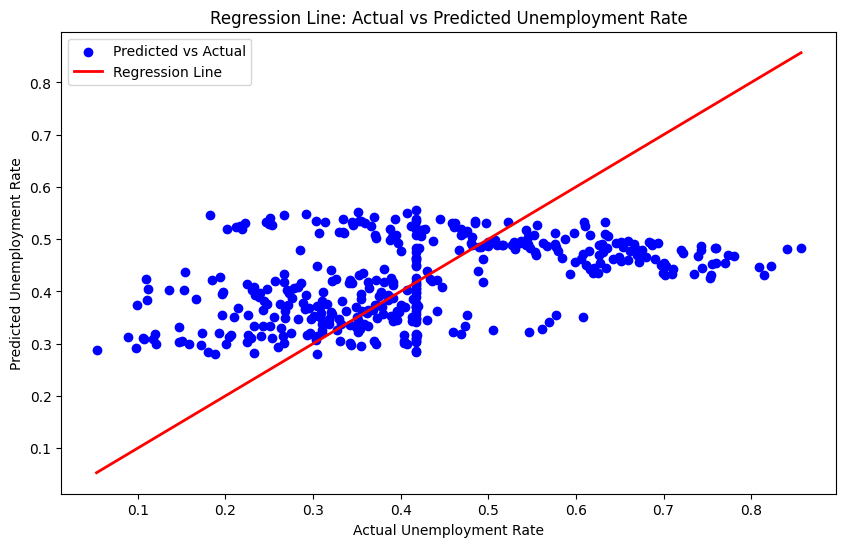

In [7]:
import matplotlib.pyplot as plt

# Plotting the regression line
plt.figure(figsize=(10, 6))

# Ensure y_pred is calculated based on the current X_test
y_pred = model.predict(X_test)  # Recalculate y_pred

# Scatter plot of the actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')

# Plotting the regression line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Regression Line')

# Labeling the plot
plt.xlabel('Actual Unemployment Rate')
plt.ylabel('Predicted Unemployment Rate')
plt.title('Regression Line: Actual vs Predicted Unemployment Rate')

# Displaying the plot
plt.legend()
plt.show()

In [46]:
from sklearn.ensemble import RandomForestRegressor
processed_df = pd.read_excel('/content/processed_data.xlsx')

# Determining independent and dependent variables
X = processed_df.drop('Unemployment Rate', axis=1)
y = processed_df['Unemployment Rate']

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the model
model = RandomForestRegressor(n_estimators=50,max_depth=4,random_state=42)  # 50 tree

# Training the model
model.fit(X_train, y_train)

# Make a guess
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 0.009174581795741805
Root Mean Squared Error (RMSE): 0.0957840372700055
R-squared (R2): 0.6621750696598672
Mean Absolute Error (MAE): 0.07758283916670679


In [43]:
from sklearn.linear_model import Ridge, Lasso
# Load the dataset
processed_df = pd.read_excel('/content/processed_data.xlsx')

# Define independent and dependent variables
X = processed_df.drop('Unemployment Rate', axis=1)
y = processed_df['Unemployment Rate']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression Model
ridge_model = Ridge(alpha=1.0, random_state=42)  # alpha is the regularization parameter
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the Ridge model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

# Lasso Regression Model
lasso_model = Lasso(alpha=0.1, random_state=42)  # alpha is the regularization parameter
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the Lasso model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)

# Print the results
print("Ridge Regression Results:")
print("Mean Squared Error (MSE):", mse_ridge)
print("Root Mean Squared Error (RMSE):", rmse_ridge)
print("R-squared (R2):", r2_ridge)
print("Mean Absolute Error (MAE):", mae_ridge)

print("\nLasso Regression Results:")
print("Mean Squared Error (MSE):", mse_lasso)
print("Root Mean Squared Error (RMSE):", rmse_lasso)
print("R-squared (R2):", r2_lasso)
print("Mean Absolute Error (MAE):", mae_lasso)


Ridge Regression Results:
Mean Squared Error (MSE): 0.021599707041501194
Root Mean Squared Error (RMSE): 0.14696838789855862
R-squared (R2): 0.20465916712965238
Mean Absolute Error (MAE): 0.11625249580150548

Lasso Regression Results:
Mean Squared Error (MSE): 0.02199008517430393
Root Mean Squared Error (RMSE): 0.14829054310475745
R-squared (R2): 0.19028472822262743
Mean Absolute Error (MAE): 0.1172025522624776
